In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(4444)

In [2]:
def get_random_norm_vector(n):
    """Возвращает нормированный вектор длины n"""
    a = []
    norm_sum = 1.0
    for i in range(n - 1):
        x = random.triangular(0, norm_sum)
        norm_sum -= x
        a.append(x)
    a.append(norm_sum)
    a = np.array(a)
    np.random.shuffle(a)
    return a


def get_random_transition_matrix(n):
    """Возвращает квадратную матрицу размерности n, состояющую из нормированных векторов"""
    g = []
    for i in range(n):
        g.append(get_random_norm_vector(n))
    return np.array(g)


def vector_stdev(va, vb):
    """Среднеквадратическое отклонение между векторами"""
    return np.sqrt(sum((b - a)**2 for b, a in zip(vb, va)))


def limit_dist_by_computing(transition_matrix, stationary_dist, eps=1e-5):
    """Численное нахождение стационарного состояния"""
    m_stationary_dist = stationary_dist ** 2
    stdev = vector_stdev(stationary_dist, m_stationary_dist)
    std_arr = []
    m = 0
    while stdev > eps:
        m_stationary_dist = stationary_dist @ transition_matrix
        m += 1
        stdev = vector_stdev(stationary_dist, m_stationary_dist)
        std_arr.append(stdev)
        stationary_dist = m_stationary_dist
    return stationary_dist, m, np.array(std_arr)


def limit_dist_by_analytic(transition_matrix):
    """Аналитическое нахождение стационарного состояния"""
    A = (transition_matrix - np.eye(n)).transpose()
    probability_dist = np.ones((1, n))

    A = np.vstack((A, probability_dist))
    B = np.zeros(n + 1)
    B[-1] = 1

    p = np.linalg.lstsq(A, B, rcond=1)[0]
    return p

In [3]:
n = 8
Markov_matrix = get_random_transition_matrix(n)
np.around(Markov_matrix, 3)

array([[0.009, 0.021, 0.002, 0.511, 0.001, 0.   , 0.362, 0.094],
       [0.412, 0.04 , 0.329, 0.01 , 0.132, 0.06 , 0.011, 0.006],
       [0.482, 0.004, 0.01 , 0.102, 0.311, 0.01 , 0.063, 0.017],
       [0.021, 0.429, 0.334, 0.029, 0.028, 0.023, 0.132, 0.005],
       [0.004, 0.   , 0.027, 0.175, 0.448, 0.002, 0.029, 0.314],
       [0.013, 0.875, 0.   , 0.005, 0.002, 0.085, 0.001, 0.018],
       [0.256, 0.396, 0.007, 0.19 , 0.016, 0.128, 0.002, 0.004],
       [0.   , 0.001, 0.022, 0.029, 0.512, 0.188, 0.206, 0.041]])

In [4]:
start_dist_1 = get_random_norm_vector(n)
np.around(start_dist_1, 3)

array([0.18 , 0.001, 0.001, 0.041, 0.01 , 0.001, 0.001, 0.766])

In [5]:
finish_dist_1, m, stdarr = limit_dist_by_computing(Markov_matrix, start_dist_1)
np.around(finish_dist_1, 3), m

(array([0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082]), 18)

In [6]:
start_dist_2 = get_random_norm_vector(n)
np.around(start_dist_2, 3)

array([0.006, 0.398, 0.559, 0.003, 0.001, 0.003, 0.007, 0.025])

In [7]:
finish_dist_2, m, stdarr2 = limit_dist_by_computing(Markov_matrix, start_dist_2)
np.around(finish_dist_2, 3), m

(array([0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082]), 18)

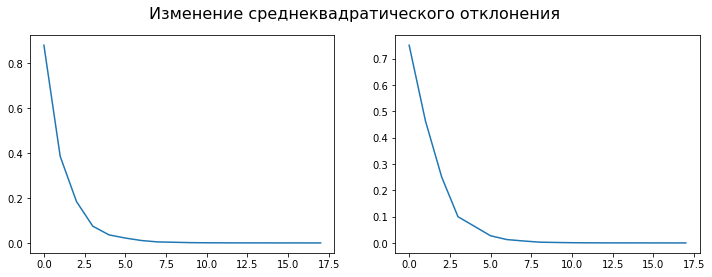

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Изменение среднеквадратического отклонения', fontsize=16)
ax1.plot(np.arange(0, len(stdarr)), stdarr)
ax2.plot(np.arange(0, len(stdarr)), stdarr2)
plt.show()

In [9]:
np.around(np.linalg.matrix_power(Markov_matrix, 36), 3)

array([[0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082],
       [0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082],
       [0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082],
       [0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082],
       [0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082],
       [0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082],
       [0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082],
       [0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082]])

In [10]:
np.around(limit_dist_by_analytic(Markov_matrix), 3)

array([0.153, 0.159, 0.112, 0.151, 0.188, 0.048, 0.107, 0.082])